                                            Pricing real estate

I.1/ Install necessary packages

In [62]:
# Basic import 
import numpy as np 
import pandas as pd
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(2)
import matplotlib.pyplot as plt
import sklearn
import tensorflow
import random as python_random

# Use function
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [37]:
# Generate a seed for future step
np.random.seed(1) 
python_random.seed(1)
tensorflow.random.set_seed(1)

I.2/ Get the data 

In [4]:
# Read the data with pandas dataframe
agence = pd.read_csv('/Users/marcimhof/Documents/Test CDI/data_usecase/agence.csv')

agence.head() #show the first 5 lines of the data 


,date_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,type_local,surface_reelle_bati,surface_terrain,nombre_pieces_principales,agent,prixcible,prixvente_initial,evaluation_agent
0,2014-01-03,210000.0,31000,Toulouse,31555815AC0067,Appartement,70.0,70.0,3.0,1,206000,216000,Renove
1,2014-02-07,162500.0,31500,Toulouse,31555807AB0464,Appartement,67.0,67.0,3.0,1,155000,163000,Ancien
2,2014-02-18,381000.0,31200,Toulouse,31555802AC0160,Appartement,100.0,100.0,4.0,1,391000,411000,Renove
3,2014-02-24,159900.0,31200,Toulouse,31555830AE0006,Appartement,57.0,57.0,3.0,1,170000,178000,Renove
4,2014-02-26,58000.0,31100,Toulouse,31555843AT0121,Appartement,34.0,34.0,2.0,1,62000,65000,Ancien


I.3/ Descriptive analysis

In [5]:
agence.describe() #get a quick look of the indicators for numeric values

,valeur_fonciere,code_postal,surface_reelle_bati,surface_terrain,nombre_pieces_principales,agent,prixcible,prixvente_initial
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03,4.000000e+03
mean,2.124442e+05,31320.197500,77.036250,280.131750,3.343750,4.511750,2.161692e+05,2.270006e+05
std,1.350077e+05,222.062297,42.930131,408.480567,1.555214,2.892914,1.379113e+05,1.448099e+05
min,2.200000e+04,31000.000000,12.000000,8.000000,1.000000,0.000000,2.400000e+04,2.500000e+04
25%,1.148075e+05,31170.000000,45.000000,45.000000,2.000000,2.000000,1.157500e+05,1.217500e+05
50%,1.830000e+05,31300.000000,70.500000,81.000000,3.000000,5.000000,1.870000e+05,1.960000e+05
75%,2.735090e+05,31500.000000,99.000000,404.000000,4.000000,7.000000,2.780000e+05,2.920000e+05
max,1.500000e+06,31830.000000,385.000000,7432.000000,11.000000,9.000000,1.532000e+06,1.609000e+06


In [6]:
agence.describe(include = [object]) #get a quick look of the indicators for str values

,date_mutation,nom_commune,id_parcelle,type_local,evaluation_agent
count,4000,4000,4000,4000,4000
unique,1350,36,3221,2,2
top,2014-02-28,Toulouse,31555803AB0513,Appartement,Ancien
freq,14,2632,11,2118,2078


Quick look of some correlation we think intuitive to reassure ourselves.

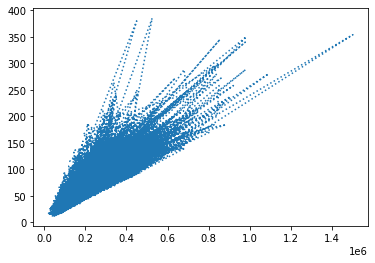

In [7]:
plt.plot(agence.valeur_fonciere,agence.surface_reelle_bati,':') # Try to see some quick correlation with plot

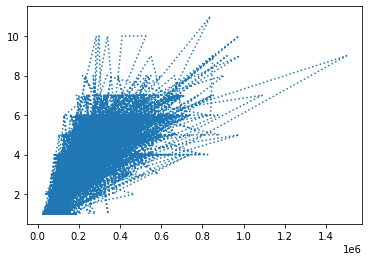

In [8]:
plt.plot(agence.valeur_fonciere,agence.nombre_pieces_principales, ':')

I.3/ Audit the Data

    a) NA's gesture


In [9]:
agence.isna().sum() # Checking NA's

date_mutation                0
valeur_fonciere              0
code_postal                  0
nom_commune                  0
id_parcelle                  0
type_local                   0
surface_reelle_bati          0
surface_terrain              0
nombre_pieces_principales    0
agent                        0
prixcible                    0
prixvente_initial            0
evaluation_agent             0
dtype: int64

We are lucky, No NA's found so no need for specific decision to take.

    b) Features Creation

Transform all the features which contains string or characters in flag or top.
It will be usefull for the models we want to implement.

To regroup certain labels or modalities, we are going to check the distribution and the destribution knowing the price we want to estimate (prix_cible).


In [10]:
agence.nom_commune.value_counts() # Distribution of a feature we want to change 

Toulouse                     2632
Tournefeuille                 182
Blagnac                       144
Muret                         119
Cugnaux                       119
Plaisance-du-Touch            111
Fonsorbes                      98
Saint-Lys                      64
Villeneuve-Tolosane            59
Cornebarrieu                   51
Portet-sur-Garonne             47
Pibrac                         44
Seysses                        35
Frouzins                       34
Roquettes                      25
Mondonville                    22
Pinsaguel                      20
Roques                         20
Fontenilles                    20
Beauzelle                      20
Lherm                          18
Labastidette                   15
Lacroix-Falgarde               15
Goyrans                        13
Saubens                        13
Eaunes                         11
Daux                           11
Bonrepos-sur-Aussonnelle        9
Sainte-Foy-de-Peyrolières       8
Saint-Clar-de-

([<matplotlib.axis.XTick at 0x7ff56c202a60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

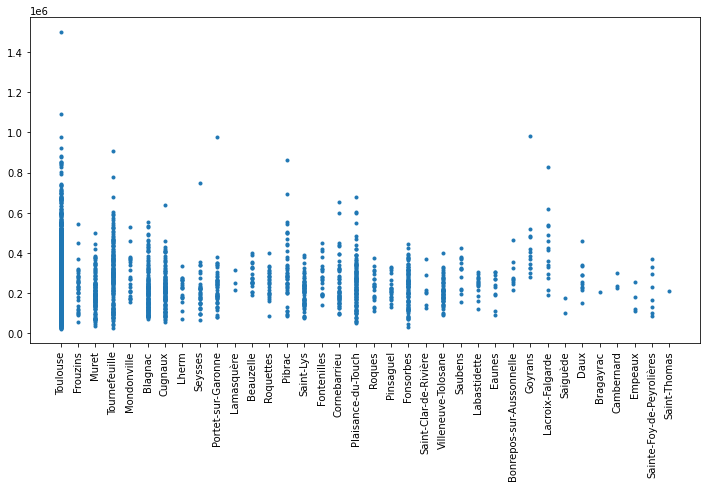

In [11]:
plt.figure(figsize = (12,6))
plt.plot(agence.nom_commune,agence.valeur_fonciere, marker = '.', linestyle = 'None')
plt.xticks(np.arange(0, 36,1),  rotation='vertical')


We represent the price of properties in terms of cities to understand the distribution.

Important fact, some of them have really small population size so we need to regroupe them because we can't do statistics with a small sample.

In [12]:
label = LabelEncoder()
agence['nom_commune_num'] = label.fit_transform(agence['nom_commune']) # Transform cities name in number

l = 0
dic = {} # Creating a disctionnary to associate the real estate mean price of each cities
for x in range (36) : 
    l = (agence.valeur_fonciere[agence['nom_commune_num'] == x].mean())
    dic[x]=l
print(dic)

sorted(dic.items(), key = lambda t: t[1]) # Sort by decreasing 

{0: 283612.1, 1: 217997.74305555556, 2: 296493.55555555556, 3: 205000.0, 4: 251212.66666666666, 5: 244220.56960784315, 6: 220969.64932773108, 7: 275298.63636363635, 8: 225672.72727272726, 9: 165700.0, 10: 229722.77551020408, 11: 279351.553, 12: 232332.57852941175, 13: 431557.3076923077, 14: 238426.66666666666, 15: 419776.0, 16: 259483.33333333334, 17: 216643.83333333334, 18: 284160.28545454546, 19: 201491.55462184874, 20: 317466.7518181818, 21: 222321.78250000003, 22: 249091.03396396397, 23: 235844.27659574468, 24: 231840.5, 25: 249492.2, 26: 137500.0, 27: 220870.0, 28: 206845.70578125, 29: 207000.0, 30: 212750.0, 31: 300774.6153846154, 32: 212828.82857142857, 33: 195773.55656155015, 34: 295528.86005494505, 35: 209487.2127118644}


[(26, 137500.0),
 (9, 165700.0),
 (33, 195773.55656155015),
 (19, 201491.55462184874),
 (3, 205000.0),
 (28, 206845.70578125),
 (29, 207000.0),
 (35, 209487.2127118644),
 (30, 212750.0),
 (32, 212828.82857142857),
 (17, 216643.83333333334),
 (1, 217997.74305555556),
 (27, 220870.0),
 (6, 220969.64932773108),
 (21, 222321.78250000003),
 (8, 225672.72727272726),
 (10, 229722.77551020408),
 (24, 231840.5),
 (12, 232332.57852941175),
 (23, 235844.27659574468),
 (14, 238426.66666666666),
 (5, 244220.56960784315),
 (22, 249091.03396396397),
 (25, 249492.2),
 (4, 251212.66666666666),
 (16, 259483.33333333334),
 (7, 275298.63636363635),
 (11, 279351.553),
 (0, 283612.1),
 (18, 284160.28545454546),
 (34, 295528.86005494505),
 (2, 296493.55555555556),
 (31, 300774.6153846154),
 (20, 317466.7518181818),
 (15, 419776.0),
 (13, 431557.3076923077)]

In [13]:
agence.nom_commune_num.value_counts()

33    2632
34     182
1      144
19     119
6      119
22     111
10      98
28      64
35      59
5       51
23      47
20      44
32      35
12      34
25      25
18      22
21      20
24      20
11      20
0       20
17      18
14      15
15      15
13      13
31      13
8       11
7       11
2        9
30       8
27       7
9        4
16       3
4        3
26       2
3        1
29       1
Name: nom_commune_num, dtype: int64

In [14]:
agence['flag_commune_inf200k'] = np.where((agence['nom_commune_num'] == 26) |
           (agence['nom_commune_num'] == 33) |
           (agence['nom_commune_num'] == 9), 1, 0)

# We regroupe cities who has the same estate pricing and to get labels with more properties

In [15]:
# Creating flag for binary features with labels
agence['flag_maison'] = np.where((agence['type_local'] == 'Appartement'), 0, 1)

agence['flag_Ancien'] = np.where((agence['evaluation_agent'] == 'Ancien'), 1, 0)

agence.head()

,date_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,type_local,surface_reelle_bati,surface_terrain,nombre_pieces_principales,agent,prixcible,prixvente_initial,evaluation_agent,nom_commune_num,flag_commune_inf200k,flag_maison,flag_Ancien
0,2014-01-03,210000.0,31000,Toulouse,31555815AC0067,Appartement,70.0,70.0,3.0,1,206000,216000,Renove,33,1,0,0
1,2014-02-07,162500.0,31500,Toulouse,31555807AB0464,Appartement,67.0,67.0,3.0,1,155000,163000,Ancien,33,1,0,1
2,2014-02-18,381000.0,31200,Toulouse,31555802AC0160,Appartement,100.0,100.0,4.0,1,391000,411000,Renove,33,1,0,0
3,2014-02-24,159900.0,31200,Toulouse,31555830AE0006,Appartement,57.0,57.0,3.0,1,170000,178000,Renove,33,1,0,0
4,2014-02-26,58000.0,31100,Toulouse,31555843AT0121,Appartement,34.0,34.0,2.0,1,62000,65000,Ancien,33,1,0,1


Remove unuseful or unproprer columns like date and remove features we have already been working on like nom_commune

In [16]:
data = agence.drop(['date_mutation', 'id_parcelle', 'type_local', 'nom_commune', 'evaluation_agent'], axis = 1)
# Remove unuseful or unproprer columns 

II./ Création train & test set 

In [17]:
# Spliting the data with clean sample
X_train, X_test, Y_train, Y_test = train_test_split(data,data.prixcible, train_size = 0.8, random_state = 2)

print('X_train')
X_train.head()


X_train


,valeur_fonciere,code_postal,surface_reelle_bati,surface_terrain,nombre_pieces_principales,agent,prixcible,prixvente_initial,nom_commune_num,flag_commune_inf200k,flag_maison,flag_Ancien
1617,219000.0,31000,57.0,57.0,3.0,8,260000,273000,33,1,0,0
3157,222734.0,31600,119.0,690.0,6.0,7,217000,228000,32,0,1,1
2960,130500.0,31700,46.0,46.0,2.0,2,130000,136000,1,0,0,0
1189,122000.0,31200,39.0,39.0,2.0,0,120000,126000,33,1,0,0
2676,275000.0,31600,108.0,336.0,5.0,4,262000,275000,19,0,1,0


In [18]:
print('Y_test')
Y_test.head()

Y_test


3846    211000
848     232000
1658     89000
3415    174000
3678    338000
Name: prixcible, dtype: int64

III./ Random Forest 

In [19]:
# Creating the model 
rf = RandomForestRegressor(n_estimators = 500, criterion = 'mse', max_features = 'sqrt', min_samples_split = 5,
                           bootstrap = True, random_state = 1).fit(X_train,Y_train)

In [20]:
# Training the model
model = rf.fit(X_train, Y_train)

# Testing the model
y_pred = rf.predict(X_test)

# Error under 2 metrics
MSE_rf = mean_squared_error(Y_test, y_pred)

MAE_rf = mean_absolute_error(Y_test, y_pred)

print('Error under the metric : MSE = ',MSE_rf)
print('Error under the metric : MAE = ',MAE_rf)

L erreur sous la metrique MSE =  27182309.898320287
L erreur sous la metrique MAE =  1772.337003975191


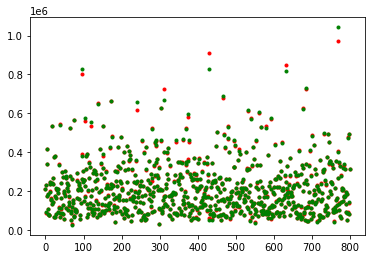

In [21]:
plt.plot(y_pred, marker = '.', linestyle = 'None', color='r')

Y_test_array = Y_test.to_numpy()
Y_test_array

plt.plot(Y_test_array,marker = '.', linestyle = 'None', color = 'g')

In [22]:
# Feature importance
rf.feature_importances_

array([0.20094122, 0.00153502, 0.10364393, 0.05491033, 0.04151137,
       0.00134785, 0.28232791, 0.29397655, 0.00219559, 0.00218146,
       0.01278452, 0.00264426])

Looking for the best paramaters (Optimization):

Testing multiple combination with a grid 

In [23]:
# Creating a grid search to get the best parameters
def grid_search(X_train, Y_train):
    estimator = RandomForestRegressor(random_state = 1) 
    param_grid = {
            "n_estimators"      : [100,200,300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False], # All the parametrs we want to test
            }
    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5) # Allow multi processing task 
    grid.fit(X_train, Y_train) # Training model
    return grid.best_params_  # Save the best parameter 

best_param = grid_search(X_train, Y_train)
best_param

{'bootstrap': False,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 200}

In [49]:
# Final model for RandomForest

RFR = RandomForestRegressor(n_jobs=-1,random_state = 1).set_params(**best_param) # applying best parameters
RFR.fit(X_train,Y_train)
y_pred = RFR.predict(X_test)

MSE_rf = mean_squared_error(Y_test, y_pred)

MAE_rf = mean_absolute_error(Y_test, y_pred)

print('Error under the metric : MSE = ',MSE_rf)
print('Error under the metric : MAE = ',MAE_rf)

L erreur sous la metrique MSE =  1677816.53125
L erreur sous la metrique MAE =  177.05625


We notice that the MAE pass from 1772 to 177 after optimization.
The error is globally smaller. 
However for the MSE it also decrease but not as we expect. 
It means that there is still some big errors.

MLP Regressor

In [63]:
# Création of seed to get the same results
os.environ['PYTHONHASHSEED']=str(2)
tensorflow.random.set_seed(2)
np.random.seed(2)
python_random.seed(2)

# Creation of the model (we want MLP so activation function is relu and identity for the output activation function)
n_features = X_train.shape[1]
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# We choose the optimsation loss method with the loss function
ADAM = Adam(learning_rate = 0.01, epsilon = 1e-5)
model.compile(optimizer = ADAM, loss = 'mse')

# The model train to reach final weights
model.fit(X_train, Y_train, epochs=500, batch_size = 100)

# Predict after the model is fitted
Y_pred = model.predict(X_test)

print('')

# Error under 2 different metrics
MSE_rf = mean_squared_error(Y_test, Y_pred)

MAE_rf = mean_absolute_error(Y_test, Y_pred)

print('Error under the metric : MSE = ',MSE_rf)
print('Error under the metric : MAE = ',MAE_rf)

Epoch 1/500
32/32 [==============================] - 0s 2ms/step - loss: 14241112064.0000
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 183375824.0000
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 51999456.0000
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 46808408.0000
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 44004408.0000
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 41924084.0000
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 39964708.0000
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 38078896.0000
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 36438988.0000
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 34837224.0000
Epoch 11/500
32/32 [==============================] - 0s 3ms/step - loss: 33614724.0000
Epoch 12/500
32/32 [=================

32/32 [==============================] - 0s 2ms/step - loss: 120465.7734
Epoch 96/500
32/32 [==============================] - 0s 2ms/step - loss: 129750.0000
Epoch 97/500
32/32 [==============================] - 0s 2ms/step - loss: 138253.0312
Epoch 98/500
32/32 [==============================] - 0s 2ms/step - loss: 101503.5391
Epoch 99/500
32/32 [==============================] - 0s 2ms/step - loss: 110195.8594
Epoch 100/500
32/32 [==============================] - 0s 2ms/step - loss: 106181.8672
Epoch 101/500
32/32 [==============================] - 0s 2ms/step - loss: 108397.1406
Epoch 102/500
32/32 [==============================] - 0s 2ms/step - loss: 120834.2031
Epoch 103/500
32/32 [==============================] - 0s 2ms/step - loss: 112800.3828
Epoch 104/500
32/32 [==============================] - 0s 2ms/step - loss: 93827.3594
Epoch 105/500
32/32 [==============================] - 0s 2ms/step - loss: 85599.0000
Epoch 106/500
32/32 [==============================] - 0s 2ms/s

32/32 [==============================] - 0s 2ms/step - loss: 28563.0430
Epoch 191/500
32/32 [==============================] - 0s 2ms/step - loss: 40738.1914
Epoch 192/500
32/32 [==============================] - 0s 2ms/step - loss: 64669.9648
Epoch 193/500
32/32 [==============================] - 0s 2ms/step - loss: 29167.1250
Epoch 194/500
32/32 [==============================] - 0s 2ms/step - loss: 42283.8008
Epoch 195/500
32/32 [==============================] - 0s 3ms/step - loss: 241953.8750
Epoch 196/500
32/32 [==============================] - 0s 2ms/step - loss: 143773.9844
Epoch 197/500
32/32 [==============================] - 0s 2ms/step - loss: 198296.0000
Epoch 198/500
32/32 [==============================] - 0s 2ms/step - loss: 847573.5000
Epoch 199/500
32/32 [==============================] - 0s 2ms/step - loss: 3854040.0000
Epoch 200/500
32/32 [==============================] - 0s 2ms/step - loss: 25252170.0000
Epoch 201/500
32/32 [==============================] - 0s 2

32/32 [==============================] - 0s 2ms/step - loss: 1109046.7500
Epoch 285/500
32/32 [==============================] - 0s 2ms/step - loss: 103960.2266
Epoch 286/500
32/32 [==============================] - 0s 2ms/step - loss: 29930.4219
Epoch 287/500
32/32 [==============================] - 0s 2ms/step - loss: 30794.5957
Epoch 288/500
32/32 [==============================] - 0s 2ms/step - loss: 19293.2246
Epoch 289/500
32/32 [==============================] - 0s 2ms/step - loss: 16698.5508
Epoch 290/500
32/32 [==============================] - 0s 2ms/step - loss: 15814.5840
Epoch 291/500
32/32 [==============================] - 0s 3ms/step - loss: 14306.3691
Epoch 292/500
32/32 [==============================] - 0s 3ms/step - loss: 14232.4863
Epoch 293/500
32/32 [==============================] - 0s 2ms/step - loss: 11503.6367
Epoch 294/500
32/32 [==============================] - 0s 2ms/step - loss: 11775.1963
Epoch 295/500
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 2ms/step - loss: 131786.5625
Epoch 380/500
32/32 [==============================] - 0s 2ms/step - loss: 55949.9336
Epoch 381/500
32/32 [==============================] - 0s 2ms/step - loss: 13224.7676
Epoch 382/500
32/32 [==============================] - 0s 2ms/step - loss: 7538.6006
Epoch 383/500
32/32 [==============================] - 0s 2ms/step - loss: 7581.3066
Epoch 384/500
32/32 [==============================] - 0s 2ms/step - loss: 42780.4453
Epoch 385/500
32/32 [==============================] - 0s 2ms/step - loss: 21701.8398
Epoch 386/500
32/32 [==============================] - 0s 2ms/step - loss: 8135.4575
Epoch 387/500
32/32 [==============================] - 0s 2ms/step - loss: 7618.2451
Epoch 388/500
32/32 [==============================] - 0s 3ms/step - loss: 5242.8809
Epoch 389/500
32/32 [==============================] - 0s 2ms/step - loss: 5679.5498
Epoch 390/500
32/32 [==============================] - 0s 2ms/step - loss

32/32 [==============================] - 0s 2ms/step - loss: 191318.8125
Epoch 475/500
32/32 [==============================] - 0s 2ms/step - loss: 4405390.5000
Epoch 476/500
32/32 [==============================] - 0s 2ms/step - loss: 1578384.0000
Epoch 477/500
32/32 [==============================] - 0s 2ms/step - loss: 251856.4531
Epoch 478/500
32/32 [==============================] - 0s 2ms/step - loss: 31046.8984
Epoch 479/500
32/32 [==============================] - 0s 2ms/step - loss: 5121.0908
Epoch 480/500
32/32 [==============================] - 0s 2ms/step - loss: 11850.7490
Epoch 481/500
32/32 [==============================] - 0s 2ms/step - loss: 64719.5508
Epoch 482/500
32/32 [==============================] - 0s 2ms/step - loss: 79202.6484
Epoch 483/500
32/32 [==============================] - 0s 2ms/step - loss: 879996.7500
Epoch 484/500
32/32 [==============================] - 0s 2ms/step - loss: 3197205.5000
Epoch 485/500
32/32 [==============================] - 0s 2m